First, let's import few libraries required in the course of our model development which evaluates various classification models.

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

I downloaded the cancer dataset from Kaggle and imported it using read_csv which converts the data into a DataFrame of the csv format.

In [134]:
data=pd.read_csv('/Users/srilekh/Downloads/data.csv')

Upon checking the various features of the dataset, i recognized that the standard errors of each geometrical feature are not required for the model prediction and hence can be removed.

In [135]:
data=data.drop(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se','compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se','fractal_dimension_se'],axis=1)

In [ ]:
data.info()
# this function gives the description of the data types and the null values of each attribute/feature.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_worst             569 non-null    float64
 13  texture_worst            569 non-null    float64
 14  perimeter_worst          5

In [137]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst',
       'Unnamed: 32'],
      dtype='object')

By observing the attributes of the dataset we can clearly notice some irrelevant features which are neither required for the analysis nor the classificaton model.

In [138]:
X=data.drop(['id','Unnamed: 32','diagnosis'],axis=1)

The diagnosis column distinguishes the data and is the feature used for classification.The diagnosis column contains two values B for 'benign' and M for 'Malignant'.1

In [139]:
y=data['diagnosis']

The values need to be converted to numerical values as the train_test_split and model.fit() use only numerical values for fitting and training the model.

In [140]:
y=[1 if x=='M'else 0 for x in data['diagnosis']]

In [141]:
y

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,


In [142]:
from sklearn.preprocessing import MinMaxScaler

In [143]:
#x = (X - np.min(X))/(np.max(X) - np.min(X)) this is the formula of how minmaxscaler works

scaler = MinMaxScaler()
x = scaler.fit_transform(X)

In [144]:
len(y)

569

In [145]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45)
y_true=y_test

In [146]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score

I just want to check if this dataset works for any model. I am just checking here on the k nearest neighbours classifier.

In [147]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [148]:
model.predict(x_test)

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0])

In [149]:
model.score(x_test,y_test)

0.9649122807017544

In [150]:
from sklearn.model_selection import GridSearchCV

So now the main model evaluator function is written below. until now I have done the basic Exploratory data Analysis, but the main motive of this project is to build a model evaluator which uses various statistical measurments. 

In [151]:
def model_evaluator(models,param_grids,x_train,y_train,x_test,y_test):
    results={}
    for name,model in models.items():
        #pipeline=Pipeline(('classifier',model))
        model.fit(x_train,y_train)
        y_predicted=model.predict(x_test)
        cm=confusion_matrix(y_test,y_predicted)

        #let's do the hyperparameter tuning using the GridSearchCV function available in the Sklearn.model_selection
        if name in param_grids:
            grid=GridSearchCV(model,param_grids[name],cv=5,scoring={'accuracy': 'accuracy','precision': 'precision','recall': 'recall','roc_auc': 'roc_auc','f1':'f1'},refit='accuracy')
            grid.fit(x_train,y_train)
            best_model = grid.best_estimator_  # Best model from GridSearchCV
            print(f"Best Parameters for {name}: {grid.best_params_} with an accuracy of {grid.best_score_}")
            results[name]=grid.best_score_
            best_index =grid.best_index_
            precision = grid.cv_results_['mean_test_precision'][best_index]
            recall = grid.cv_results_['mean_test_recall'][best_index]
            f1_score=grid.cv_results_['mean_test_f1'][best_index]
            roc_auc = grid.cv_results_['mean_test_roc_auc'][best_index]
            
            print(f"Precision: {precision:.4f}")
            print(f"Recall: {recall:.4f}")
            print(f'f1score: {f1_score:.4f}')
            print(f"ROC AUC: {roc_auc:.4f}")        
        
        #Since we used 5 cross validation, the mean of all such is taken.
        #.4f is used to get value upto 4 decimal places
        # let's plot the confusion matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.title("Confusion Matrix--"f'{name}')
        plt.show()
    
    model_best=max(results,key=results.get)
    best_accuracy=results[model_best]
    print(f"\nThe best model is '{model_best}' with an accuracy of {best_accuracy}")
    return 

The different machine learning algorithm funcitons have been embedded into the models dictionary created below.

In [152]:
models={
    'Logistic Regression':LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Naive Bayes': GaussianNB()
}

The below given param_grids contains various values for the hyperparameters of each ML algorithm. These are used in the GridSearchCV to tune the models to get the best parameters for the model

In [153]:
param_grids={
    'Logistic Regression': {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Decision Tree': {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]},
    'Random Forest': {'n_estimators': [50, 100, 150], 'max_depth': [5, 10, 20], 'min_samples_split': [2, 5, 10]},
    'Gradient Boosting': {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2]},
    'Naive Bayes':{'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
}

Best Parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'} with an accuracy of 0.9749367088607596
Precision: 0.9800
Recall: 0.9538
f1score: 0.9665
ROC AUC: 0.9972


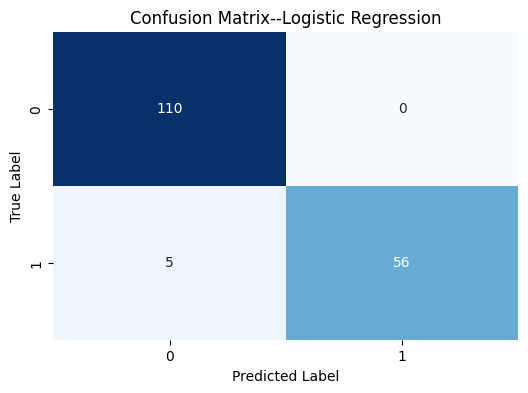

Best Parameters for K-Nearest Neighbors: {'n_neighbors': 7, 'weights': 'uniform'} with an accuracy of 0.9672784810126582
Precision: 0.9726
Recall: 0.9402
f1score: 0.9558
ROC AUC: 0.9865


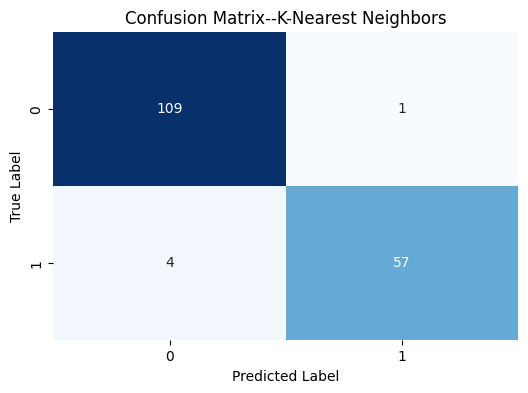

Best Parameters for Support Vector Machine: {'C': 10, 'kernel': 'rbf'} with an accuracy of 0.977373417721519
Precision: 0.9800
Recall: 0.9602
f1score: 0.9698
ROC AUC: 0.9961


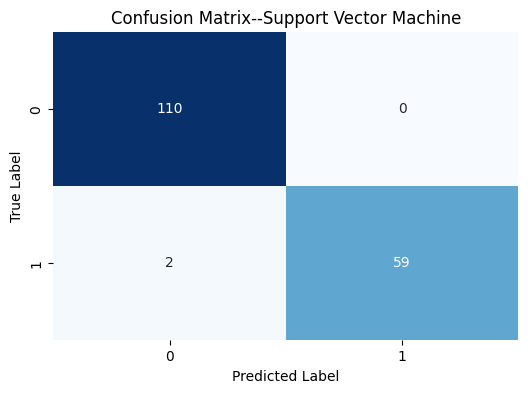

Best Parameters for Decision Tree: {'max_depth': 3, 'min_samples_split': 5} with an accuracy of 0.9321835443037975
Precision: 0.9346
Recall: 0.8869
f1score: 0.9080
ROC AUC: 0.9487


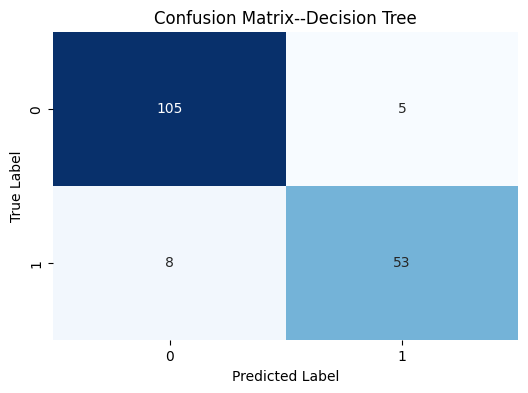

Best Parameters for Random Forest: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50} with an accuracy of 0.9648417721518987
Precision: 0.9688
Recall: 0.9402
f1score: 0.9530
ROC AUC: 0.9892


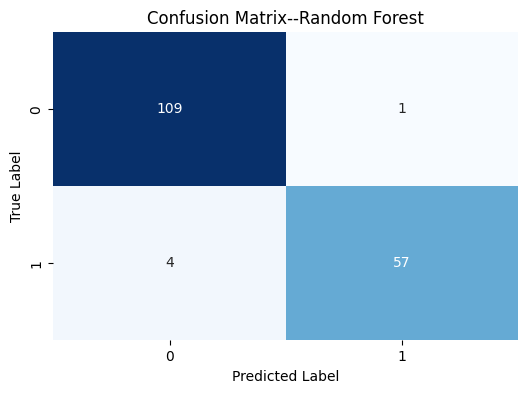

Best Parameters for Gradient Boosting: {'learning_rate': 0.2, 'n_estimators': 100} with an accuracy of 0.962246835443038
Precision: 0.9660
Recall: 0.9335
f1score: 0.9490
ROC AUC: 0.9928


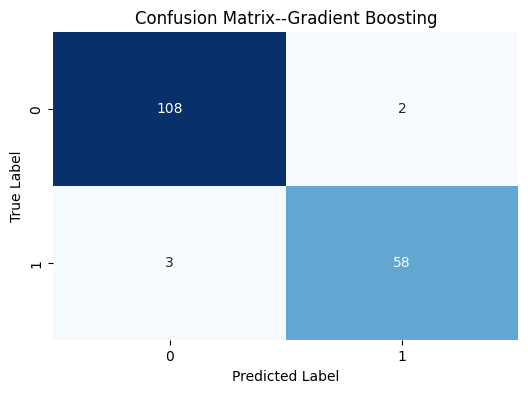

Best Parameters for Naive Bayes: {'var_smoothing': 1e-09} with an accuracy of 0.9296518987341772
Precision: 0.8918
Recall: 0.9271
f1score: 0.9087
ROC AUC: 0.9836


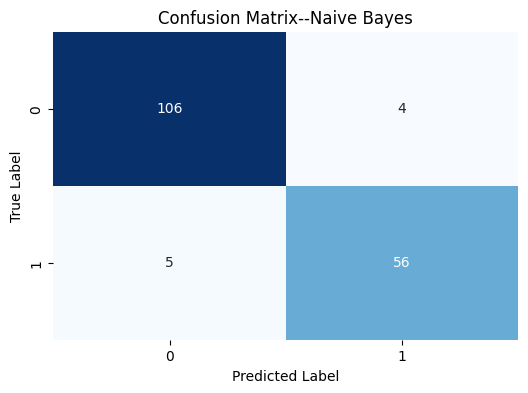


The best model is 'Support Vector Machine' with an accuracy of 0.977373417721519


In [154]:
model_evaluator(models,param_grids,x_train,y_train,x_test,y_test)

Here, in this model I have taken few hyperparameters. One can tune the hyperparameters as they wish by including more values into the params_grid.

This model evaluator can be used for any dataset that has undergone the Exploratory data analysis. This also gives the model with the best accuracy,precision,recall, ROC AUC.The hyperparameters for the best model are displayed.



Though here i have used the Breast cancer dataset, one can use this model for any dataset.
This model helps one to choose which model suits for their dataset based on different classifications. 